In [48]:
import numpy as np
import pandas as pd

#to get financial data
from pandas_datareader import data as pdr

#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
%matplotlib inline
#visualization with seaborn
import seaborn as sns


In [73]:
df = pdr.DataReader('NKLA', 'yahoo', '2020-05-01', '2020-07-24')
df = df[['Close']]

In [75]:
#Returns computation 
df['returns'] = df.pct_change()
percentage = df['returns']
percentage = percentage.dropna()

In [77]:
mean = np.mean(df['returns'])
std_dev = np.std(df['returns'])

In [78]:
order_percentage = sorted(df['returns'])

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


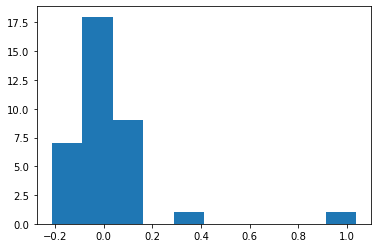

In [79]:
plt.hist(order_percentage)
plt.show()

In [84]:
np.percentile(percentage, 0.1)

-0.21175151770661835

In [53]:
print ("99.99% Actual loss won't exceed: " , "{0:.2f}%".format(np.percentile(order_percentage, .01) * 100))
print ("99% Actual loss won't exceed: " + "{0:.2f}%".format(np.percentile(order_percentage, 1) * 100))
print ("95% Actual loss won't exceed: " + "{0:.2f}%".format(np.percentile(order_percentage, 5) * 100))
print ("Losses expected to exceed " + "{0:.2f}%".format(np.percentile(order_percentage, 5) * 100) + " " + str(.05*len(percentage)) + " out of " + str(len(percentage)) + " days")
varg = np.percentile(order_percentage, 5)

99.99% Actual loss won't exceed:  nan%
99% Actual loss won't exceed: nan%
95% Actual loss won't exceed: nan%
Losses expected to exceed nan% 0.8 out of 16 days
